In [164]:
"""
CULC Breakout Rooms:
(5) 4-person room (A, B, C, D, E)
(9) 6-person room (F, G, H, I, J, K, L, M, N)
(1) 7-person room (O)
(1) 8-person room (P)
(1) 9-person room (Q)
(2) 10-person room (R, S)
(3) 12-person room (T, U, V)
"""

import random as rd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pylab as plt

room_map = {4:['A','B','C','D','E'], 6:['F','G','H','I','J','K','L','M','N'], 7:['O'], 8:['P'], 9:['Q'], 10:['R','S'], 12:['T','U','V']}

def generate_groups():
    #40 groups generated with random group sizes and times
    possible_hours = list(range(1, 25))
    possible_group_sizes = [4, 6, 7, 8, 9, 10, 12]

    with open('generated_groups.txt', 'w') as f:
        f.write("Hour Room Group_Size\n")
        for i in possible_hours[::2]:
            group_sizes = rd.sample(possible_group_sizes, 3)
            for x in group_sizes:
                room = room_map[x][0]
                f.write(str(i) + " " + str(room) + " " + str(x) + "\n")
                
def count_groups():
    file = open("generated_groups.txt","r")
    Counter = 0
    Content = file.read()
    CoList = Content.split("\n")

    for i in CoList:
        if i:
            Counter += 1
    return Counter - 1

In [165]:
generate_groups()
inputted_group_size = int(input("Enter the size of your study group: "))
inputted_desired_time = int(input("Enter the start time of your reservation (you will have a 2 hour block). Use 24 hour clock: "))

Enter the size of your study group: 4
Enter the start time of your reservation (you will have a 2 hour block). Use 24 hour clock: 18


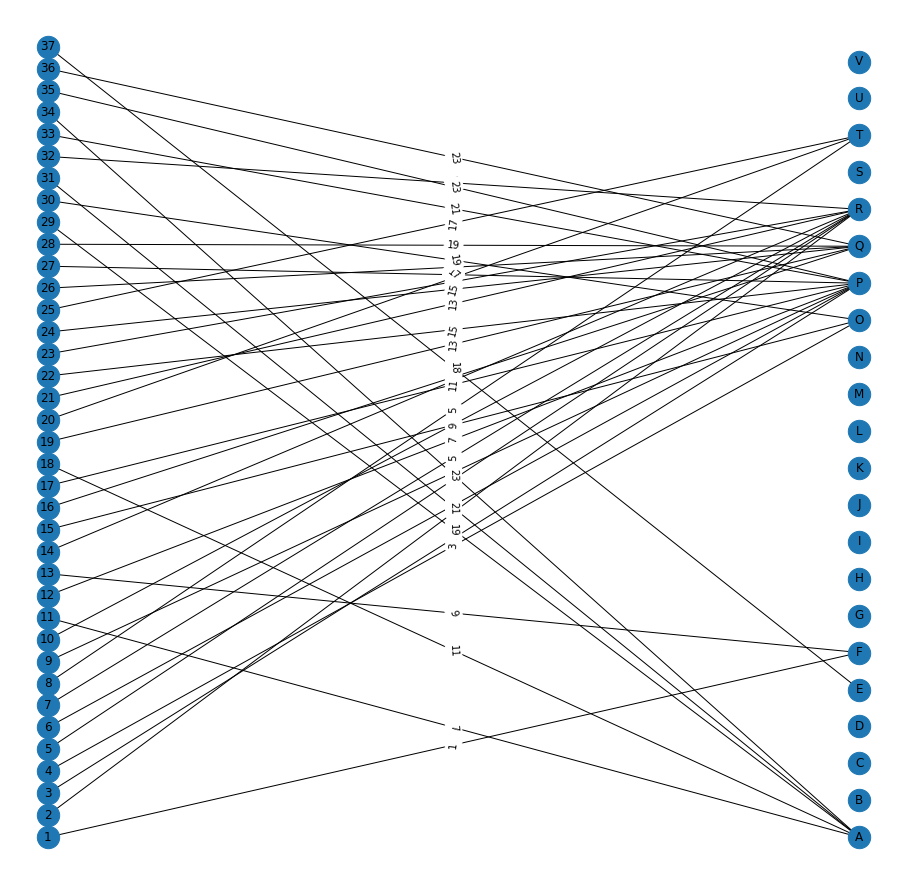

In [168]:
G = nx.Graph()

group_count = count_groups()

groups = list(range(1, group_count + 1))
rooms = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V']

G.add_nodes_from(groups, bipartite=0) # Add the node attribute "bipartite"
G.add_nodes_from(rooms, bipartite=1)


with open('generated_groups.txt', 'r') as f:
    for i in range(group_count + 1):
        if i == 0:
            text = f.readline().split()
            continue
        
        text = f.readline().split()
        
        G.add_edges_from([(i, text[1])], weight=text[0])

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

plt.figure(3,figsize=(16,16)) 
pos = {}
pos.update({node: [1, index] for index, node in enumerate(groups)})
pos.update({node: [2, index*(len(groups)/len(rooms))] for index, node in enumerate(rooms)})
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
node_labels = {node:node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

nx.draw(G, pos, node_size=500, edge_cmap=plt.cm.Reds, font_size=8)
plt.show()

In [167]:
status = "no rooms"
desired_rooms = room_map[inputted_group_size]
for room in desired_rooms[::-1]:
    current_reservations = G[room]
    if current_reservations == {}:
        with open('generated_groups.txt', 'a') as f:
            f.write(str(inputted_desired_time) + " " + str(room) + " " + str(inputted_group_size) + "\n")
        print("Room " + str(room) + " is reserved for you to use at time (24 hours clock) " + str(inputted_desired_time))
        status = "yes rooms"
        break
    else:
        time_list = []
        for edge in list(dict(current_reservations).values()):
            time_list.append(edge['weight'])
        time_list = list(map(int, time_list))
        
        if inputted_desired_time in time_list or inputted_desired_time - 1 in time_list or inputted_desired_time + 1 in time_list:
            continue
            
if status == "no rooms":
    print("Unfortunately we do not have a room avaliable for " + str(inputted_group_size) + " at time (24 hours clock) " + str(inputted_desired_time) + ". Please try again with a new time.")

Room E is reserved for you to use at time (24 hours clock) 18
